# **Presentation of package openlca2bw**

<br>

This Jupiter Notebook will present the openlca2bw package (V1.0).

This notebook is design to get you started with the main functions of this package (importing a complete dataset from [OpenLCA](https://www.openlca.org/), based on IPC connexion or [JSON-LD](https://helpdesk.lifecycleinitiative.org/distribution/data-formats/) extraction, updating an existing Brightway2 project with data from OpenLCA).

<br>

This package is available on github: https://github.com/cyrillefrancois/openlca2bw 

<br>

To install it in your python environment

`pip install git+https://github.com/cyrillefrancois/openlca2bw`

# **Requirements**

The ongoing version is working for the basic [Brightway2](https://2.docs.brightway.dev/) version (I have not test yet if all functions used are compatible with [Brightway2.5](https://github.com/brightway-lca/brightway25))

this mean :

bw2analyzer<0.10.99, bw2calc==1.8.1, bw2data<3.99, bw2io<0.8.9, bw2parameters>=0.6.5

<br>

The package '[olca-ipc](https://github.com/GreenDelta/olca-ipc.py)' is also required (V0.0.11)

In [ ]:
import openlca2bw as olca2bw
import brightway2 as bw


---


## **Full import from IPC Server:**

<br>

To illustrate this functionnality, I base this part on the OpenLCA case study about bottles, provide by GreenDelta. This case study is available on the openlca nexus: https://nexus.openlca.org/casestudy/Other%20free%20case%20studies 

This example need to be imported in OpenLCA software first, it contains the background dataset of ELCD and the case study folder named 'A Water Bottle'. The database is complete with the entire biosphere generated by OpenLCA (62159 flows) and some LCIA methods.

<br>

To complete this database, you can start to model the bottle example in your own process folder. (for this example named 'A case study')

<br>

Before runing `load_openLCA_IPC()` you need to activate the IPC connexion in OpenLCA (Tools/Developer tools/IPC Server). The default port is 8080, but you can choose an other one, and specify it with the function argument `port`.





In [ ]:
# 'user_databases' argument require a dictionary with your foreground dataset.
# keys will be your future database in BW and values the related folders in OpenLCA containing your processes
# values can be a list or a single name
User_folder = {'GreenDelta':'A Water Bottle'}

# 'excluded_folders' argument is used to specify folder that you don't want to be imported
# folders not specified in 'user_databases' or in 'excluded_folders' will be 
# extracted in a single bw2 database named by argument 'nonuser_db_name'
unused_folders = ['A case study']

# 'selected_methods' argument is a list of methods names that will be extracted
# you can specify [] to import no method or 'all' to import all available methods
# the default value is 'all' 
selected_methods = ['CML-IA baseline',
                    'ILCD 2011 Midpoint+',
                    'ReCiPe 2016 Midpoint (H)']

olca2bw.load_openLCA_IPC(project_name="ELCD bottle import",
                        nonuser_db_name = 'ELCD', 
                        user_databases=User_folder,
                        excluded_folders=unused_folders,
                        selected_methods=selected_methods,
                        overwrite = True)



Creation of background tables (units, locations)

Project ELCD bottle import created on brightway environment


Creating OpenLCA biosphere



Extracting 62159 flows from OpenLCA:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:05


Title: Extracting 62159 flows from OpenLCA:
  Started: 09/25/2022 15:45:45
  Finished: 09/25/2022 15:45:50
  Total time elapsed: 00:00:05
Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applied 2 strategies in 0.07 seconds


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:09


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 15:45:52
  Finished: 09/25/2022 15:46:02
  Total time elapsed: 00:00:09
  CPU %: 60.50
  Memory %: 1.66


Extracting 3 LCIA methods from OpenLCA:


Created database: biosphere3

Creating OpenLCA LCIA methods



0% [###] 100% | ETA: 00:00:00 | Item ID: CML-IA baseline               
Total time elapsed: 00:00:26


Title: Extracting 3 LCIA methods from OpenLCA:
  Started: 09/25/2022 15:48:25
  Finished: 09/25/2022 15:48:52
  Total time elapsed: 00:00:26


Treatment of openlca processes, 610 processes extracted from OpenLCA to ELCD database



Importing processes from OpenLCA 



0% [##############################] 100% | ETA: 00:00:00 | Item ID: 610
Total time elapsed: 00:00:51
Treatment of openlca processes, 11 processes extracted from OpenLCA to GreenDelta database


Title: Treatment of openlca processes, 610 processes extracted from OpenLCA to ELCD database
  Started: 09/25/2022 15:49:00
  Finished: 09/25/2022 15:49:52
  Total time elapsed: 00:00:51


0% [###########] 100% | ETA: 00:00:00 | Item ID: 11
Total time elapsed: 00:00:00


Title: Treatment of openlca processes, 11 processes extracted from OpenLCA to GreenDelta database
  Started: 09/25/2022 15:49:52
  Finished: 09/25/2022 15:49:52
  Total time elapsed: 00:00:00


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:29


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 15:49:52
  Finished: 09/25/2022 15:50:22
  Total time elapsed: 00:00:29
  CPU %: 44.40
  Memory %: 3.06


Writing activities to SQLite3 database:
0% [###########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 15:50:27
  Finished: 09/25/2022 15:50:27
  Total time elapsed: 00:00:00
  CPU %: 195.30
  Memory %: 3.08
Research of 1436 not defined providers

957 exchanges deleted due to no provider or to many providers available

Units checking for activities exchanges

7 exchanges modified to match units

Importing parameters from OpenLCA



This complete importation is long, due to the number of elementary flows, but also because ELCD processes are often a complete inventary (System process).

<br>

Moreover, many exchanges do not specify a distinct provider.

Here 957 exchanges were deleted, because providers where not available or not specified.

In OpenLCA, unspecified providers are handle with a specific approach (default provider or random provider).

<br>

The time of import is also highly depend of the number of LCIA methods imported. 

For this example the ELCD dataset is quite small,only 610 activities.

In [ ]:
bw.projects.set_current("ELCD bottle import")
print({k: v['number'] for k, v in bw.databases.items()})

{'biosphere3': 62159, 'ELCD': 610, 'GreenDelta': 11}


Imported data are now available in brightway2 and can assess.

In [ ]:
rdm_act = bw.Database('GreenDelta').random()
print(rdm_act)
print('\n')
for exc in rdm_act.exchanges():
    print(exc)

LCIA_method = ('CML-IA baseline','Global warming (GWP100a)')
lca = bw.LCA({rdm_act: 1},method=LCIA_method)
lca.lci()
lca.lcia()
print('\n')
print(lca.score)

'PC Transport B' (unit, None, None)
Exchange: 1.0 unit 'PC Transport B' (unit, None, None) to 'PC Transport B' (unit, None, None)>
Exchange: 0.013000000000000001 ton kilometer 'Lorry transport, Euro 0, 1, 2, 3, 4 mix, 22 t total weight, 17,3t max payload' (ton kilometer, RER, None) to 'PC Transport B' (unit, None, None)>
Exchange: 1.0 unit 'PC Production of bottle preform, lid and lable' (unit, None, None) to 'PC Transport B' (unit, None, None)>
0.5680002381159384


We can observe a small difference between this result and OpenLCA results, mainly because OpenLCA apply 'not appropriate' provider, when several providers are available for an exchange without default provider. Here, exchange with unspecify provider with several providers is deleted.

<br>

It's recommanded to specify all your provider before transfer, exchanges with a single provider not specify are still handled correctly.


## Updating my project

<br>

With `update_openLCA_IPC()` you can now update your project with new data, or with changes in your previous processes. 

You can also import an additional LCIA method.


In [ ]:
# 'update_folders' argument is a dictionary to specify the folder you want to import, as values
# and the bw2 database in which you want it, as key.
# values can be single folder name or a list of folders names
# if a database is already existing in brightway with a specified name, it will be replace to be updated.

update_folders = {'Myself': ['A case study']}

olca2bw.update_openLCA_IPC(project_name = "ELCD bottle import",
                        update_databases = update_folders, 
                        update_methods=['TRACI 2.1'])

Creation of background tables (units, locations)



Extracting 1 LCIA methods from OpenLCA:


Updating of project ELCD bottle import

Update of methods


0% [#] 100% | ETA: 00:00:00 | Item ID: TRACI 2.1                     
Total time elapsed: 00:00:00


Title: Extracting 1 LCIA methods from OpenLCA:
  Started: 09/25/2022 16:15:20
  Finished: 09/25/2022 16:15:20
  Total time elapsed: 00:00:00

Importing processes from OpenLCA



Treatment of openlca processes, 6 processes extracted from OpenLCA to Myself database
0% [######] 100% | ETA: 00:00:00 | Item ID: 6
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Treatment of openlca processes, 6 processes extracted from OpenLCA to Myself database
  Started: 09/25/2022 16:15:34
  Finished: 09/25/2022 16:15:35
  Total time elapsed: 00:00:00


0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 16:15:35
  Finished: 09/25/2022 16:15:35
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 2.25
Units checking for activities exchanges

8 exchanges modified to match units

Importing parameters from OpenLCA



Updating is way faster.

<br>

Small exploration of imported activities

In [ ]:
print({k: v['number'] for k, v in bw.databases.items()})
print('\n')
rdm_act = bw.Database('Myself').random()
print(rdm_act)
print('\n')
for exc in rdm_act.exchanges():
    print(exc)

{'biosphere3': 62159, 'ELCD': 610, 'GreenDelta': 11, 'Myself': 6}
'PET Bottle Filling' (unit, None, None)
Exchange: 1.0 unit 'PET Bottle Filling' (unit, None, None) to 'PET Bottle Filling' (unit, None, None)>
Exchange: 1.0 unit 'PET Transport A' (unit, None, None) to 'PET Bottle Filling' (unit, None, None)>
Exchange: 1.0 kilogram 'Drinking water, production mix, at plant, water purification treatment, from groundwater' (kilogram, RER, None) to 'PET Bottle Filling' (unit, None, None)>


Let's compare PET bottle with PC (polycarbonate) bottle 

In [ ]:
Bottle_PC = [act for act in bw.Database('Myself') 
                if act['name'] == 'PC Bottle Filling'][0]
Bottle_PET = [act for act in bw.Database('Myself') 
                if act['name'] == 'PET Bottle Filling'][0]

lca = bw.LCA({Bottle_PC: 1},method=LCIA_method)
lca.lci()
lca.lcia()
print('PC bottle result (GWP100) for 1 bootle): '+str(lca.score)+'\n')

lca = bw.LCA({Bottle_PET: 1},method=LCIA_method)
lca.lci()
lca.lcia()
print('PET bottle result (GWP100) for 1 bootle): '+str(lca.score)+'\n')

0.48096569450053817

In [ ]:
def print_recursive_calculation(activity, lcia_method, lca_obj=None, total_score=None, amount=1, level=0, max_level=3, cutoff=1e-2):
    if lca_obj is None:
        lca_obj = bw.LCA({activity: amount}, lcia_method)
        lca_obj.lci()
        lca_obj.lcia()
        total_score = lca_obj.score
    elif total_score is None:
        raise ValueError
    else:
        lca_obj.redo_lcia({activity: amount})
        if abs(lca_obj.score) <= abs(total_score * cutoff):
            return
    print("{}{:4.3f} ({:06.4f}): {:.70}".format("  " * level, lca_obj.score / total_score, lca_obj.score, str(activity)))
    if level < max_level:
        for exc in activity.technosphere():
            print_recursive_calculation(
                activity=exc.input, 
                lcia_method=lcia_method, 
                lca_obj=lca_obj, 
                total_score=total_score, 
                amount=amount * exc['amount'] / activity['production amount'], 
                level=level + 1, 
                max_level=max_level, 
                cutoff=cutoff
            )

In [ ]:
print_recursive_calculation(Bottle_PC, LCIA_method, amount=1, max_level=3, cutoff=0)

1.000 (0.4810): 'PC Bottle Filling' (unit, None, None)
  0.001 (0.0006): 'Drinking water, production mix, at plant, water purification treatmen
  0.999 (0.4804): 'PC Transport A' (unit, None, None)
    0.994 (0.4783): 'PC Granulate Production' (kilogram, None, None)
      0.008 (0.0038): 'Polybutadiene granulate (PB), production mix, at plant' (kilogram, RE
      0.969 (0.4661): 'Polycarbonate granulate (PC), production mix, at plant' (kilogram, RE
      0.018 (0.0084): 'Polyethylene low density granulate (PE-LD), production mix, at plant'
    0.004 (0.0021): 'Lorry transport, Euro 0, 1, 2, 3, 4 mix, 22 t total weight, 17,3t max


In [ ]:
print_recursive_calculation(Bottle_PET, LCIA_method, amount=1, max_level=3, cutoff=0)
            

1.000 (0.2025): 'PET Bottle Filling' (unit, None, None)
  0.997 (0.2020): 'PET Transport A' (unit, None, None)
    0.987 (0.1998): 'PET Granulate Production' (gram, None, None)
      0.939 (0.1901): 'Polyethylene terephthalate (PET) granulate, production mix, at plant,
      0.038 (0.0077): 'Polyethylene high density granulate (PE-HD), production mix, at plant
      0.010 (0.0020): 'Polypropylene granulate (PP), production mix, at plant' (kilogram, RE
    0.011 (0.0021): 'Lorry transport, Euro 0, 1, 2, 3, 4 mix, 22 t total weight, 17,3t max
  0.003 (0.0006): 'Drinking water, production mix, at plant, water purification treatmen




---

<br>

# Import from JSON-LD data

<br>

The openlca2bw package can also import data from JSON-LD exported from OpenLCA.

[JSON-LD](https://helpdesk.lifecycleinitiative.org/distribution/data-formats/) data are store in a .zip file, with folders containing *processes*, *lcia_categories*, *lcia_methods*, *flows*, *parameters* etc...

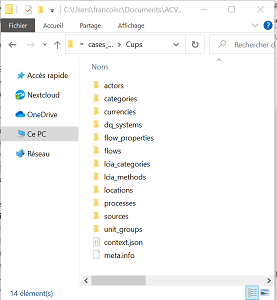

<br>

For this import I will use the Ceramic cup vs. Paper cup case study, based on ecoinvent 3.4, available for free on OpenLCA website.

https://nexus.openlca.org/casestudy/ecoinvent%20case%20studies

<br>

After the importation in OpenLCA, you can export JSON-LD data, it will create a .zip file.

<br>

`load_openLCA_Json()` arguments are similar to ICP connexion import.

You can either specify the path to the .zip file, or a directory with already all folders extracted.
(Here I used extracted directory to save time)

When exporting JSON-LD files from OpenLCA I only select three LCIA methods, and I without specify argument (selected_methods), it will import all LCIA methods contain in the JSON-LD file. 


In [ ]:
# 'path_zip' argument is the path to the .zip file or the path to 
# the directory containing all folders in the zip file, previously extracted
# here I have previously extract folders.

#Zip_path = r'C:\Users\francoisc\Documents\ACV\cases_studies_olca\Cups.zip' if not extracted before
Zip_path = r'C:\Users\francoisc\Documents\ACV\cases_studies_olca\Cups'


olca2bw.load_openLCA_Json(path_zip=Zip_path,
                          project_name='Cups example',
                          user_databases={"First import":'Cup comparison'},
                          overwrite = True)


Extracting json files from folder:


Project Cups example created on brightway environment

Extraction and  pre-treatment of json zip folder



0% [########] 100% | ETA: 00:00:00 | Item ID: processes      
Total time elapsed: 00:00:53


Title: Extracting json files from folder:
  Started: 09/25/2022 16:18:17
  Finished: 09/25/2022 16:19:10
  Total time elapsed: 00:00:53


Extracting 2645 flows from OpenLCA:



Creating OpenLCA biosphere



0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Extracting 2645 flows from OpenLCA:
  Started: 09/25/2022 16:21:34
  Finished: 09/25/2022 16:21:34
  Total time elapsed: 00:00:00
Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applied 2 strategies in 0.00 seconds


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 16:21:34
  Finished: 09/25/2022 16:21:34
  Total time elapsed: 00:00:00
  CPU %: 68.10
  Memory %: 14.34


Extracting 3 LCIA methods from OpenLCA:


Created database: biosphere3

Creating OpenLCA LCIA methods



0% [###] 100% | ETA: 00:00:00 | Item ID: IPCC 2013                     
Total time elapsed: 00:00:02


Title: Extracting 3 LCIA methods from OpenLCA:
  Started: 09/25/2022 16:21:44
  Finished: 09/25/2022 16:21:46
  Total time elapsed: 00:00:02


Treatment of openlca processes, 14889 processes extracted from OpenLCA to EcoInvent database



Importing processes from OpenLCA 



0% [##############################] 100% | ETA: 00:00:00 | Item ID: 14889
Total time elapsed: 00:03:31
Treatment of openlca processes, 23 processes extracted from OpenLCA to First import database


Title: Treatment of openlca processes, 14889 processes extracted from OpenLCA to EcoInvent database
  Started: 09/25/2022 16:21:48
  Finished: 09/25/2022 16:25:19
  Total time elapsed: 00:03:31


0% [#######################] 100% | ETA: 00:00:00 | Item ID: 23
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Treatment of openlca processes, 23 processes extracted from OpenLCA to First import database
  Started: 09/25/2022 16:25:19
  Finished: 09/25/2022 16:25:20
  Total time elapsed: 00:00:00


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:08


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 16:25:20
  Finished: 09/25/2022 16:26:28
  Total time elapsed: 00:01:08
  CPU %: 43.00
  Memory %: 17.52


Writing activities to SQLite3 database:
0% [#######################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 16:27:28
  Finished: 09/25/2022 16:27:28
  Total time elapsed: 00:00:00
  CPU %: 33.20
  Memory %: 18.67
Research of 2 not defined providers

0 exchanges deleted due to no provider or to many providers available

Units checking for activities exchanges

15 exchanges modified to match units

Importing parameters from OpenLCA



This full import is quite long, but all ecoinvent are now in brightway.

Note that for this demonstration I only extract elementary flows related to ecoinvent (2645 flows), to save time.

In [ ]:
bw.projects.set_current('Cups example')
print({k: v['number'] for k, v in bw.databases.items()})
print('\n')
print(str(len(bw.methods))+" LCIA impacts categories presents in the projects")
print('\n')
rdm_act = bw.Database('First import').random()
print(rdm_act)
for exc in rdm_act.exchanges():
    print(exc)

{'biosphere3': 2645, 'EcoInvent': 14889, 'First import': 23, 'Second import': 5}
69 LCIA impacts categories presents in the projects
'Lid production' (unit, None, None)
Exchange: 1.0 unit 'Lid production' (unit, None, None) to 'Lid production' (unit, None, None)>
Exchange: 0.00286 kilogram 'polystyrene production, high impact | polystyrene, high impact | Cutoff, U' (kilogram, RER, None) to 'Lid production' (unit, None, None)>
Exchange: 0.00037 ton kilometer 'transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified | transport, freight, lorry, unspecified | Cutoff, U' (ton kilometer, RER, None) to 'Lid production' (unit, None, None)>


## Updating my database with an other JSON-LD file

<br>

In the same project you can now import new dataset or updated dataset, that you have previously exported from OpenLCA. 

In this case, you only need to export folders  of processes containing your models.

In [ ]:
Zip_path = r'C:\Users\francoisc\Documents\ACV\cases_studies_olca\cupsbis.zip'

olca2bw.update_openLCA_Json(path_zip=Zip_path,
                            project_name='Cups example',
                            update_databases={"Second import":'Cup case study'})

Extracting json files from OpenLCA zip folder:


Updating of project Cups example

Extraction and  pre-treatment of json zip folder



0% [######] 100% | ETA: 00:00:00 | Item ID: parameters     
Total time elapsed: 00:00:00


Title: Extracting json files from OpenLCA zip folder:
  Started: 09/25/2022 16:56:35
  Finished: 09/25/2022 16:56:35
  Total time elapsed: 00:00:00

Importing processes from OpenLCA



Treatment of openlca processes, 5 processes extracted from OpenLCA to Second import database
0% [#####] 100% | ETA: 00:00:00 | Item ID: 5
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Treatment of openlca processes, 5 processes extracted from OpenLCA to Second import database
  Started: 09/25/2022 16:56:36
  Finished: 09/25/2022 16:56:36
  Total time elapsed: 00:00:00


0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 16:56:36
  Finished: 09/25/2022 16:56:36
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 2.86
Research of 6 not defined providers

0 exchanges deleted due to no provider or to many providers available

Units checking for activities exchanges

14 exchanges modified to match units

Importing parameters from OpenLCA



Imported data can be used in brightway2

In [ ]:
print({k: v['number'] for k, v in bw.databases.items()})
print('\n')
print(str(len(bw.methods))+" LCIA impacts categories presents in the projects")
print('\n')
rdm_act = bw.Database('Second import').random()
print(rdm_act)
for exc in rdm_act.exchanges():
    print(exc)

5

In [ ]:
LCIA_method = ('IPCC 2013', 'climate change - GWP 100a')
Ceramic_cup = [act for act in bw.Database('Second import') if act['name'] == 'Ceramic mug use'][0]
print_recursive_calculation(Ceramic_cup, LCIA_method, amount=1, max_level=3, cutoff=0.01)

1.000 (0.0002): 'Ceramic mug use' (ml, None, None)
  0.909 (0.0002): 'Mug washing by hands' (unit, None, None)
    0.025 (0.0000): 'soap production | soap | Cutoff, U' (kilogram, RER, None)
      0.015 (0.0000): 'market for palm oil, crude | palm oil, crude | Cutoff, U' (kilogram, 
    0.760 (0.0001): 'electricity voltage transformation from medium to low voltage | elect
      0.749 (0.0001): 'market for electricity, medium voltage | electricity, medium voltage 
      0.012 (0.0000): 'market for electricity, low voltage | electricity, low voltage | Cuto
    0.040 (0.0000): 'treatment of wastewater, from residence, capacity 1.1E10l/year | wast
      0.011 (0.0000): 'sewer grid construction, 1.1E10l/year, 242 km | sewer grid, 1.1E10l/y
    0.080 (0.0000): 'Ceramic mug production' (unit, None, None)
      0.061 (0.0000): 'sanitary ceramics production | sanitary ceramics | Cutoff, U' (kilogr
      0.011 (0.0000): 'transport, freight, sea, transoceanic ship | transport, freight, sea,
  0.09

Parameters are preserved during import, as well as uncertainty type and main informations.

For units a conversion is made to match with units used in brightway2

In [ ]:
from bw2data.parameters import ActivityParameter, DatabaseParameter, ProjectParameter

#Global parameters in OpenLCA are saved as ProjectParameter
for param in ProjectParameter.select():
    print(param, param.amount)

In [ ]:
for param in ActivityParameter.select()[5:15]:
    print(param, param.amount)

Some parameters are renamed due to program handling (e.g. 'sorted' is not accepted in BW) and related formulas are changed in consequence.



---

<br>

# Import in existing brightway project
<br>

You can also import OpenLCA models in an existing brightway2 project, that was setup with brightway. 

You only need to be sure to use the same version of the database (e.g. EcoInvent)

<br>

Here is an example related to EcoInvent 3.6, where I will import models from students exercices.

In [ ]:
#bw.projects.set_current('Test EI 3.6')
#bw.bw2setup()
#path_to_ei36 = r'C:\Users\francoisc\Documents\ACV\Base de données\Ecoinvent\3.6\Cut_off'
#ei35cut = bw.SingleOutputEcospold2Importer(fpei35cut, 'ei36_cutoff')
#ei35cut.apply_strategies()
#ei35cut.statistics()

bw.projects.set_current('Test EI 3.6')
print(list(bw.databases))
try:
    bw.projects.delete_project('Import Students',delete_dir=True)
except:
    pass
    
bw.projects.copy_project('Import Students')
bw.projects.set_current('Import Students')

['biosphere3', 'ei36_cutoff']


### First case, import from IPC server
<br>

Don't forget to launch IPC Server in OpenLCA !!!

In this case, my students used 'System Process' activities to model their products. All openlca2bw functions have a `exclude_S` argument, it's usefull when you have both 'System' and 'Unit' processes. 

It will replace all 'System' processes by 'Unit' ones equivalent, when it is possible, in order to import only 'Unit' processes. 

Brightway2 has better memory management than OpenLCA that require a lot of memory to calculate model base on 'Unit' processes 

In [ ]:
olca2bw.update_openLCA_IPC(project_name='Import Students',
                           update_databases={'Rong': '0TD_RongNIE'}, 
                           exclude_S=True)

Creation of background tables (units, locations)

Updating of project Import Students


Importing processes from OpenLCA



Treatment of openlca processes, 20 processes extracted from OpenLCA to Rong database
0% [####################] 100% | ETA: 00:00:00 | Item ID: 20
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Treatment of openlca processes, 20 processes extracted from OpenLCA to Rong database
  Started: 09/25/2022 17:10:17
  Finished: 09/25/2022 17:10:17
  Total time elapsed: 00:00:00


0% [####################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 17:10:17
  Finished: 09/25/2022 17:10:17
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 4.19
Research of 23 not defined providers

0 exchanges deleted due to no provider or to many providers available

Units checking for activities exchanges

35 exchanges modified to match units

Importing parameters from OpenLCA



### Second case, import from JSON-LD file

<br>

Here I directly import JSON-LD data sended by my student without using OpenLCA software.

I only need the name of his folder.

In [ ]:
Zip_path = r'C:\Users\francoisc\Documents\ACV\cases_studies_olca\td_JessicaSouza.zip'

olca2bw.update_openLCA_Json(path_zip=Zip_path,project_name='Import Students',
                            update_databases={'Jessica': '0TD_Souza'}, 
                            exclude_S=True)
print(list(bw.databases))

Extracting json files from OpenLCA zip folder:


Updating of project Import Students

Extraction and  pre-treatment of json zip folder



0% [######] 100% | ETA: 00:00:00 | Item ID: parameters     
Total time elapsed: 00:00:01


Title: Extracting json files from OpenLCA zip folder:
  Started: 09/25/2022 17:11:11
  Finished: 09/25/2022 17:11:13
  Total time elapsed: 00:00:01

Importing processes from OpenLCA



Treatment of openlca processes, 20 processes extracted from OpenLCA to Jessica database
0% [####################] 100% | ETA: 00:00:00 | Item ID: 20
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Treatment of openlca processes, 20 processes extracted from OpenLCA to Jessica database
  Started: 09/25/2022 17:11:16
  Finished: 09/25/2022 17:11:16
  Total time elapsed: 00:00:00


0% [####################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/25/2022 17:11:16
  Finished: 09/25/2022 17:11:16
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 4.01
Units checking for activities exchanges

35 exchanges modified to match units

Importing parameters from OpenLCA

['biosphere3', 'ei36_cutoff', 'Rong', 'Jessica']
